In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Environment Initialization

- Shuttle capacity $k$: 15
- Arrivals distribution $e \in E$: $unif\{1,5\}$
- Waiting Cost $c_h$: 2
- Shuttle Cost $c_f$: 100
- Discount $\gamma$: 0,95
- Platform Capacity $cap$: 200
- States $s \in S$: $[0,200]$
- Actions $a \in A$: [dispatch , don't dispatch]


In [2]:
shuttleCap = 15
env = [1,2,3,4,5]
shuttleCost = 100
waitingCost = 2
y = 0.95
platformCap = 200
S = range(0,201)
unif_dist = 1/5

V_t1 = {s: 0 for s in S}
V_t = V_t1.copy()

A = [0,1]

## Calculate Action-Reward Function

$R(s,a) = c_f*a + c_h*\min(0, s-k*a)$


In [66]:
def reward(state, action, shuttleCost, waitingCost, shuttleCap):
    cost = (shuttleCost*action) + \
            waitingCost*max(0,state-shuttleCap*action)
    return -cost

## Determine Next State

$s'(s,a,e) = \max[0,\min(s+e, cap)-a*\min(s+e, cap)]$

In [4]:
def get_next_state(state, action, shuttleCap, platformCap, e):
    
    # update state for new arrivals
    s_prime = min(state+e, platformCap)
    
    # update state for action
    s_prime = s_prime - action*(min(shuttleCap,s_prime))
    s_prime = max(0, s_prime)
    assert 0 <= s_prime <= 200
    return s_prime

## Estimate Action-Value

$q'(a,s) = R(s,a) + \gamma*\frac{1}{|E|}\sum_{e \in E} V(s',a', e)$

In [69]:
def getEV(s, a, shuttleCap, platformCap, env, unif_dist, V_t1, y):
    r = reward(s, a, shuttleCost, waitingCost, shuttleCap)
    states = [get_next_state(s, a, shuttleCap, platformCap, e) for e in env]
    future_values = [V_t1[s]*unif_dist for s in states]
    expected_future = sum(future_values)
    action_value = r + y*expected_future
    
    return action_value

## Value Iteration

The goal in value iteration is to find the optimal value for every state. From this, we can back out the optimal policy.

* Iteratively update the value function
* For each iteration $i$:
    * Update $V_i(s)$ by calculating $V_{i-1}(s')$
    * $V_i(s)$ is $\max(V_{i-1}(s', a))$ for $a \in A$
* Repeat until $\epsilon$ convergence

When value function convergences, the policy is optimal 

In [70]:
# Initialize 
V_t = {s: 0 for s in S}
V_t1 = V_t.copy()
policy = {s: 0 for s in S}

theta = 1e-5
delta = 1e6 
while delta > theta:
    V_t1 = V_t.copy()
    for s in S:
        # Calculate Value of each possible action for each state
        action_values = [getEV(s, a, shuttleCap, platformCap, env, unif_dist, V_t1, y) for a in A]
        
        # Record the policy chosen
        policy[s] = np.argmax(action_values)
        
        # Update value
        V_t[s] = max(action_values)
    delta = min(delta, max([V_t1[s]-V_t[s] for s in V_t.keys()]))

Text(0,0.5,'Value')

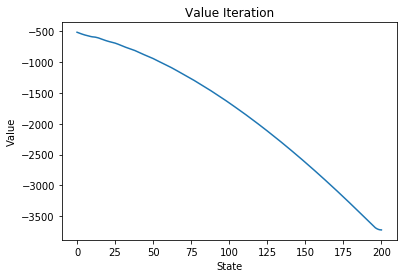

In [71]:
plt.plot(V_t.keys(), V_t.values())
plt.title("Value Iteration")
plt.xlabel("State")
plt.ylabel("Value")

Text(0,0.5,'Policy')

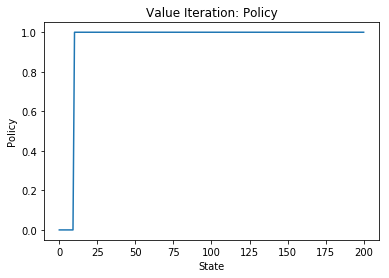

In [60]:
plt.plot(policy.keys(), policy.values())
plt.title("Value Iteration: Policy")
plt.xlabel("State")
plt.ylabel("Policy")

## Policy Iteration

Cycle of:
- Policy Evaluation
- Policy Improvement (greedy selection)

Terminates when policy no longer updates

In [61]:
best_values = {s: None for s in S}

V_t = {s: 0 for s in S}

policy = {s: np.random.randint(2) for s in S}
policy_1 = {s: np.random.randint(2) for s in S}

count = 0

In [73]:
while True:
    
    # Policy Evaluation
    for s in S:
        action_values = [getEV(s, a, shuttleCap, platformCap, env, unif_dist, V_t, y) for a in A]
        
        # Calculate the value function for the given policy
        V_t[s] = action_values[policy[s]]

        # Store the policy with the best estimated value
        best_values[s] = np.argmax(action_values)
    
    # Policy Improvement
    ## Update policy with current best policy
    policy_1 = best_values.copy()
    
    print("Iteration:", count)
    count+=1
    
    # Check if the policy has converged,
    # If not, update the policy
    if all([policy_1[s] == policy[s] for s in S]):
        break
    else:
        policy = policy_1.copy()

Iteration: 18


Text(0,0.5,'Policy (1: send, 0: no send)')

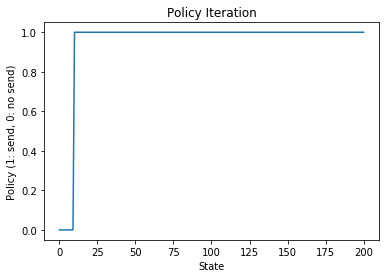

In [53]:
plt.plot(policy.keys(), policy.values())
plt.title("Policy Iteration: Policy")
plt.xlabel("State")
plt.ylabel("Policy (1: send, 0: no send)")

Text(0,0.5,'Estimated Value')

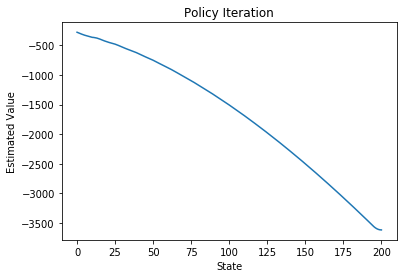

In [57]:
plt.plot(policy.keys(), V_t.values())
plt.title("Policy Iteration")
plt.xlabel("State")
plt.ylabel("Estimated Value")